In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as vutils
import numpy as np
import matplotlib.pyplot as plt

from components import *

device = torch.device("cuda:0" if (torch.cuda.is_available()) else "cpu")

In [2]:
BATCH_SIZE = 128
INPUT_SIZE = Generator.INPUT_SIZE
REAL_LABEL, FAKE_LABEL = 1, 0
dataloader = get_data_loader(train=True, batch_size=BATCH_SIZE)

In [3]:
netG = Generator().to(device)
netD = Discriminator().to(device)
optimizerD = optim.Adam(netD.parameters(), lr=0.0002, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=0.0002, betas=(0.5, 0.999))

criterionD = nn.BCELoss().to(device)
criterionG = nn.MSELoss(reduction='mean').to(device)

G_losses, D_losses = [], []

In [4]:
def train(num_epochs = 1):

    label_real = torch.full((BATCH_SIZE,), REAL_LABEL, device=device, dtype=torch.float)
    label_fake = torch.full((BATCH_SIZE,), FAKE_LABEL, device=device, dtype=torch.float)

    for epoch in range(num_epochs):
        print('   EPOCH: ', epoch)
        for i, data in enumerate(dataloader, 0):
            # ===========TRAIN_DISCRIMINSTOR============
            netD.zero_grad()
            data_real = data[0].to(device)
            output_real = netD(data_real).view(-1)
            errD_real = criterionD(output_real, label_real)
            errD_real.backward()
            D_x = output_real.mean().item()

            noise = torch.randn(BATCH_SIZE, INPUT_SIZE, 1, 1, device=device)
            data_fake = netG(noise)
            output_fake = netD(data_fake.detach()).view(-1)
            errD_fake = criterionD(output_fake, label_fake)
            errD_fake.backward()
            D_G_z1 = output_fake.mean().item()

            errD = errD_real + errD_fake
            optimizerD.step()

            # ===============TRAIN_GENERATOR===============
            netG.zero_grad()
            fxs = netD(data_real, feature_matching='all')
            fgzs = netD(data_fake, feature_matching='all')

            diffs = list()
            for fx, fgz in zip(fxs, fgzs):
                mean_fx = torch.mean(fx, 0).detach()
                mean_fgz = torch.mean(fgz, 0)
                diff = criterionG(mean_fx, mean_fgz)
                diffs.append(diff)
            errG = torch.sum(torch.stack(diffs))

            errG.backward()
            optimizerG.step()

            # Output training stats
            if i % 100 == 0:
                print('[%.3d/%d]   Loss_D: %.4f   Loss_G: %.4f   D(x): %.4f   D(G(z)): %.4f'
                      % (i, len(dataloader), errD.item(), errG.item(), D_x, D_G_z1))

            G_losses.append(errG.item())
            D_losses.append(errD.item())


## TRAINING PROCESS

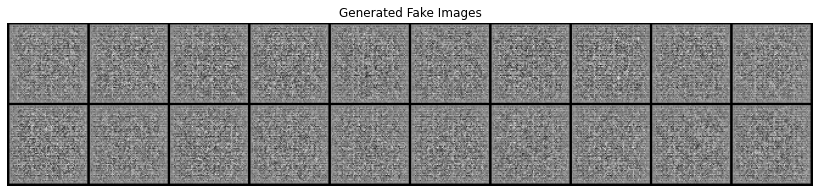

In [5]:
generate_images(netG)

In [6]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 2.1534   Loss_G: 0.4723   D(x): 0.2016   D(G(z)): 0.2023
[100/468]   Loss_D: 0.0558   Loss_G: 0.0447   D(x): 0.9739   D(G(z)): 0.0278
[200/468]   Loss_D: 0.0204   Loss_G: 0.0367   D(x): 0.9893   D(G(z)): 0.0095
[300/468]   Loss_D: 0.0434   Loss_G: 0.0353   D(x): 0.9846   D(G(z)): 0.0268
[400/468]   Loss_D: 0.0766   Loss_G: 0.0313   D(x): 0.9602   D(G(z)): 0.0342
   EPOCH:  1
[000/468]   Loss_D: 0.0263   Loss_G: 0.0278   D(x): 0.9881   D(G(z)): 0.0140
[100/468]   Loss_D: 0.3893   Loss_G: 0.0208   D(x): 0.8586   D(G(z)): 0.1982
[200/468]   Loss_D: 0.0260   Loss_G: 0.0231   D(x): 0.9897   D(G(z)): 0.0153
[300/468]   Loss_D: 0.0230   Loss_G: 0.0221   D(x): 0.9944   D(G(z)): 0.0165
[400/468]   Loss_D: 0.0181   Loss_G: 0.0244   D(x): 0.9961   D(G(z)): 0.0138
   EPOCH:  2
[000/468]   Loss_D: 0.9076   Loss_G: 0.0133   D(x): 0.7235   D(G(z)): 0.4115
[100/468]   Loss_D: 0.0534   Loss_G: 0.0164   D(x): 0.9730   D(G(z)): 0.0245
[200/468]   Loss_D: 0.0272   Loss_G: 

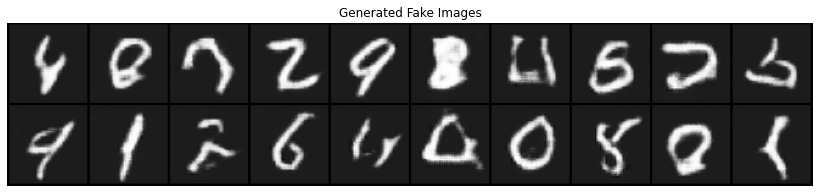

In [7]:
generate_images(netG)

In [8]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0258   Loss_G: 0.0201   D(x): 0.9890   D(G(z)): 0.0123
[100/468]   Loss_D: 0.2430   Loss_G: 0.0161   D(x): 0.9709   D(G(z)): 0.1635
[200/468]   Loss_D: 0.0128   Loss_G: 0.0200   D(x): 0.9934   D(G(z)): 0.0060
[300/468]   Loss_D: 0.0069   Loss_G: 0.0228   D(x): 0.9963   D(G(z)): 0.0032
[400/468]   Loss_D: 0.7452   Loss_G: 0.0170   D(x): 0.7797   D(G(z)): 0.3506
   EPOCH:  1
[000/468]   Loss_D: 0.0539   Loss_G: 0.0176   D(x): 0.9754   D(G(z)): 0.0264
[100/468]   Loss_D: 0.0142   Loss_G: 0.0176   D(x): 0.9944   D(G(z)): 0.0084
[200/468]   Loss_D: 0.0125   Loss_G: 0.0235   D(x): 0.9944   D(G(z)): 0.0067
[300/468]   Loss_D: 0.1343   Loss_G: 0.0188   D(x): 0.9136   D(G(z)): 0.0323
[400/468]   Loss_D: 0.0161   Loss_G: 0.0204   D(x): 0.9898   D(G(z)): 0.0056
   EPOCH:  2
[000/468]   Loss_D: 0.0120   Loss_G: 0.0257   D(x): 0.9948   D(G(z)): 0.0065
[100/468]   Loss_D: 0.0063   Loss_G: 0.0196   D(x): 0.9977   D(G(z)): 0.0039
[200/468]   Loss_D: 0.2311   Loss_G: 

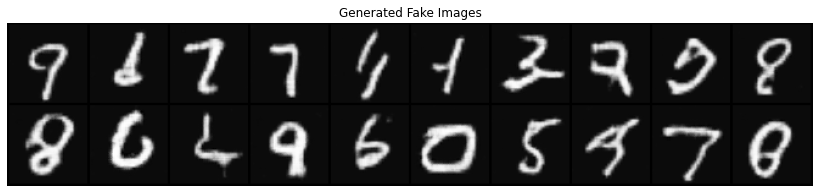

In [9]:
generate_images(netG)

In [10]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0205   Loss_G: 0.0189   D(x): 0.9846   D(G(z)): 0.0045
[100/468]   Loss_D: 0.0171   Loss_G: 0.0149   D(x): 0.9979   D(G(z)): 0.0147
[200/468]   Loss_D: 0.0315   Loss_G: 0.0162   D(x): 0.9740   D(G(z)): 0.0038
[300/468]   Loss_D: 0.0074   Loss_G: 0.0174   D(x): 0.9969   D(G(z)): 0.0043
[400/468]   Loss_D: 0.0128   Loss_G: 0.0236   D(x): 0.9904   D(G(z)): 0.0029
   EPOCH:  1
[000/468]   Loss_D: 0.0175   Loss_G: 0.0173   D(x): 0.9880   D(G(z)): 0.0050
[100/468]   Loss_D: 0.0173   Loss_G: 0.0196   D(x): 0.9875   D(G(z)): 0.0037
[200/468]   Loss_D: 0.3800   Loss_G: 0.0167   D(x): 0.9291   D(G(z)): 0.2176
[300/468]   Loss_D: 0.1006   Loss_G: 0.0157   D(x): 0.9626   D(G(z)): 0.0514
[400/468]   Loss_D: 0.1494   Loss_G: 0.0166   D(x): 0.8954   D(G(z)): 0.0250
   EPOCH:  2
[000/468]   Loss_D: 0.1718   Loss_G: 0.0130   D(x): 0.8705   D(G(z)): 0.0132
[100/468]   Loss_D: 0.0393   Loss_G: 0.0151   D(x): 0.9884   D(G(z)): 0.0254
[200/468]   Loss_D: 0.0275   Loss_G: 

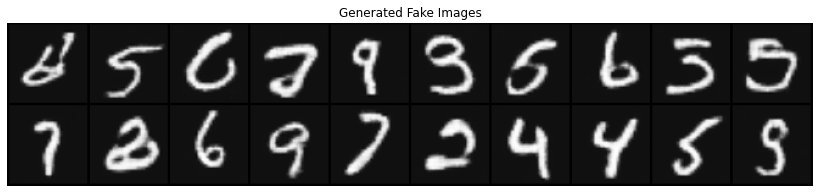

In [11]:
generate_images(netG)

In [12]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.7421   Loss_G: 0.0116   D(x): 0.8723   D(G(z)): 0.3743
[100/468]   Loss_D: 0.0300   Loss_G: 0.0151   D(x): 0.9768   D(G(z)): 0.0057
[200/468]   Loss_D: 0.0154   Loss_G: 0.0202   D(x): 0.9988   D(G(z)): 0.0138
[300/468]   Loss_D: 0.0214   Loss_G: 0.0171   D(x): 0.9830   D(G(z)): 0.0016
[400/468]   Loss_D: 0.0072   Loss_G: 0.0203   D(x): 0.9989   D(G(z)): 0.0059
   EPOCH:  1
[000/468]   Loss_D: 0.0095   Loss_G: 0.0195   D(x): 0.9914   D(G(z)): 0.0006
[100/468]   Loss_D: 0.0016   Loss_G: 0.0204   D(x): 0.9989   D(G(z)): 0.0005
[200/468]   Loss_D: 0.0021   Loss_G: 0.0265   D(x): 0.9985   D(G(z)): 0.0006
[300/468]   Loss_D: 0.7335   Loss_G: 0.0127   D(x): 0.5733   D(G(z)): 0.0038
[400/468]   Loss_D: 0.0837   Loss_G: 0.0165   D(x): 0.9554   D(G(z)): 0.0323
   EPOCH:  2
[000/468]   Loss_D: 0.0124   Loss_G: 0.0177   D(x): 0.9925   D(G(z)): 0.0047
[100/468]   Loss_D: 0.0099   Loss_G: 0.0179   D(x): 0.9960   D(G(z)): 0.0058
[200/468]   Loss_D: 0.0060   Loss_G: 

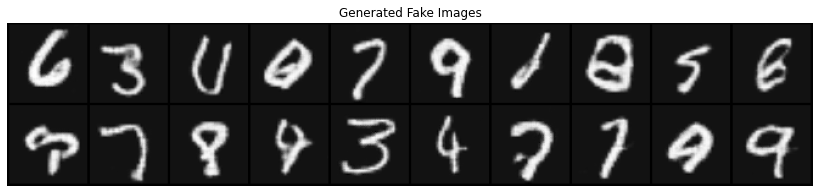

In [13]:
generate_images(netG)

In [14]:
train(num_epochs=10)

   EPOCH:  0
[000/468]   Loss_D: 0.0041   Loss_G: 0.0161   D(x): 0.9991   D(G(z)): 0.0032
[100/468]   Loss_D: 0.0046   Loss_G: 0.0177   D(x): 0.9975   D(G(z)): 0.0020
[200/468]   Loss_D: 0.0049   Loss_G: 0.0202   D(x): 0.9958   D(G(z)): 0.0007
[300/468]   Loss_D: 0.0054   Loss_G: 0.0204   D(x): 0.9990   D(G(z)): 0.0040
[400/468]   Loss_D: 0.0020   Loss_G: 0.0276   D(x): 0.9980   D(G(z)): 0.0000
   EPOCH:  1
[000/468]   Loss_D: 0.0027   Loss_G: 0.0229   D(x): 0.9988   D(G(z)): 0.0015
[100/468]   Loss_D: 0.4609   Loss_G: 0.0113   D(x): 0.8926   D(G(z)): 0.2643
[200/468]   Loss_D: 0.1043   Loss_G: 0.0166   D(x): 0.9191   D(G(z)): 0.0094
[300/468]   Loss_D: 0.0591   Loss_G: 0.0168   D(x): 0.9534   D(G(z)): 0.0088
[400/468]   Loss_D: 0.0319   Loss_G: 0.0164   D(x): 0.9926   D(G(z)): 0.0233
   EPOCH:  2
[000/468]   Loss_D: 0.1545   Loss_G: 0.0144   D(x): 0.8755   D(G(z)): 0.0003
[100/468]   Loss_D: 0.0102   Loss_G: 0.0162   D(x): 0.9962   D(G(z)): 0.0062
[200/468]   Loss_D: 0.0119   Loss_G: 

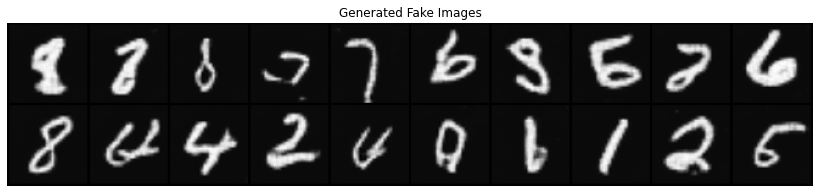

In [15]:
generate_images(netG)

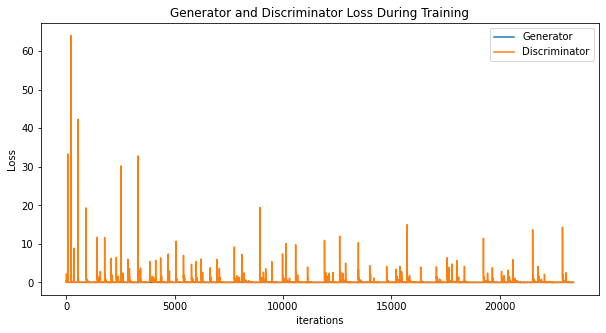

In [16]:
plot_losses(G_losses, D_losses)